In [6]:
import os
import csv
from neurosim.tools.eval_multimodel import _extract_hpsteps, _get_agg

wdir='../results/20210907-ES1500it/'
wdir_name='EVOL'
merge_es=True
steps=[100]

outputfile = 'steps_per_episode_during_training_{}.png'.format(
    wdir_name.replace(' ', '_'))

all_wdir_steps, _ = _extract_hpsteps(wdir)

training_results = []
for wdir_steps in all_wdir_steps:
  with open(os.path.join(wdir_steps, 'ActionsPerEpisode.txt')) as f:
      training_results.extend([int(float(eps)) for _,eps in csv.reader(f, delimiter='\t')])


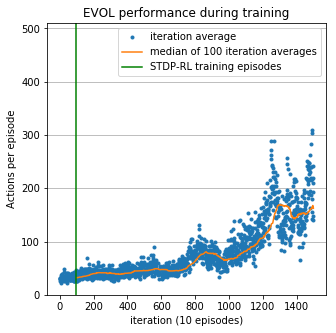

In [48]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.ylim(0, 510)
plt.grid(axis='y')
plt.ylabel('Actions per episode')
plt.title('EVOL performance during training')

STEP = 10
merged_tr_results = _get_agg(training_results, STEP, np.average, overlap=False)
min_tr_results = _get_agg(training_results, STEP, np.amin, overlap=False)
max_tr_results = _get_agg(training_results, STEP, np.amax, overlap=False)

tr_medians = {STEP: _get_agg(merged_tr_results, STEP, np.median) for STEP in steps}
tr_averages = {STEP: _get_agg(merged_tr_results, STEP, np.average) for STEP in steps}

# plt.plot(list(range(len(max_tr_results))), max_tr_results, '.')
plt.plot(list(range(len(merged_tr_results))), merged_tr_results, '.')
# plt.plot(list(range(len(min_tr_results))), min_tr_results, '.')
for step, medians in tr_medians.items():
    plt.plot([t + step for t in range(len(medians))], medians)
# for step, averages in tr_averages.items():
#     plt.plot([t + step for t in range(len(averages))], averages)


plt.xlabel('iteration ({} episodes)'.format(STEP))
plt.axvline(x=951 / 10, c='g')

# plt.legend(['iteration max', 'iteration average', 'iteration min'] +
plt.legend(['iteration average',
            'median of 100 iteration averages',
            'STDP-RL training episodes'])

# plt.show()
plt.savefig('evol-training.png', dpi=300)

In [14]:
import os
import csv
from neurosim.tools.eval_multimodel import _extract_hpsteps, _get_agg

wdir='../results/evol-stdp-rl/'
wdir_name='EVOL+STDP-RL'
merge_es=True
steps=[100]

outputfile = 'steps_per_episode_during_training_EVOL-STDP-RL.png'

results = []
with open(os.path.join(wdir, 'performance.csv')) as f:
    for row in csv.DictReader(f):
        results.append({k:float(v) for k,v in row.items()})

# all_wdir_steps, _ = _extract_hpsteps(wdir)

# training_results = []
# for wdir_steps in all_wdir_steps:
#   with open(os.path.join(wdir_steps, 'ActionsPerEpisode.txt')) as f:
#       training_results.extend([int(float(eps)) for _,eps in csv.reader(f, delimiter='\t')])


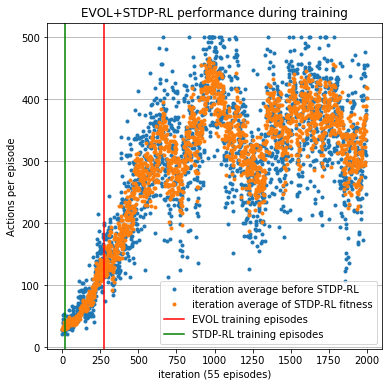

In [49]:

plt.figure(figsize=(6,6))

plt.grid(axis='y')
plt.ylabel('Actions per episode')
plt.title('EVOL+STDP-RL performance during training')

plt.plot([r['pre-mean'] for r in results], '.')
plt.plot([r['post-mean'] for r in results], '.')

plt.xlabel('iteration (55 episodes)'.format(5))
total_episodes = 2000 * 55
evol_episodes = 1500 * 10

plt.axvline(x=2000 * evol_episodes / total_episodes, c='r')
plt.axvline(x=2000 * 951 / total_episodes, c='g')

# 5 * (1 episode before STDP-RL + 10 episodes of STDP-RL)

plt.legend(['iteration average before STDP-RL',
            'iteration average of STDP-RL fitness', 
            'EVOL training episodes',
            'STDP-RL training episodes'])
#   ['median of {} iteration averages'.format(step) for step in tr_medians.keys()] +
#   ['averages of {} iteration averages'.format(step) for step in tr_averages.keys()]

# plt.show()
plt.savefig('evol-stdp-rl-training.png', dpi=300)

In [34]:
evol_episodes / total_episodes

0.13636363636363635

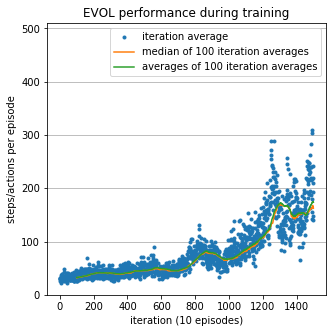

In [50]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.ylim(0, 510)
plt.grid(axis='y')
plt.ylabel('steps/actions per episode')
plt.title('EVOL performance during training')

STEP = 10
merged_tr_results = _get_agg(training_results, STEP, np.average, overlap=False)
min_tr_results = _get_agg(training_results, STEP, np.amin, overlap=False)
max_tr_results = _get_agg(training_results, STEP, np.amax, overlap=False)

tr_medians = {STEP: _get_agg(merged_tr_results, STEP, np.median) for STEP in steps}
tr_averages = {STEP: _get_agg(merged_tr_results, STEP, np.average) for STEP in steps}

# plt.plot(list(range(len(max_tr_results))), max_tr_results, '.')
plt.plot(list(range(len(merged_tr_results))), merged_tr_results, '.')
# plt.plot(list(range(len(min_tr_results))), min_tr_results, '.')
for step, medians in tr_medians.items():
    plt.plot([t + step for t in range(len(medians))], medians)
for step, averages in tr_averages.items():
    plt.plot([t + step for t in range(len(averages))], averages)

# plt.legend(['iteration max', 'iteration average', 'iteration min'] +
plt.legend(['iteration average'] +
  ['median of {} iteration averages'.format(step) for step in tr_medians.keys()] +
  ['averages of {} iteration averages'.format(step) for step in tr_averages.keys()])
plt.xlabel('iteration ({} episodes)'.format(STEP))

plt.show()
# plt.savefig(outputfile)